 Model Chosen: LSTM
Why LSTM?

Designed to handle time-dependent data (like temperature over days).

Handles long-term dependencies better than traditional RNNs.

Works well with univariate and multivariate forecasting.

 Workflow Overview
We'll follow these steps:

Prepare the Data

Convert to Supervised Learning format

Scale the Data

Build and Train the LSTM Model

Forecast Future Values

Visualize Results

 STEP 1: Data Preparation
We’ll load your daily temperature data and use the last N days to predict the next day.

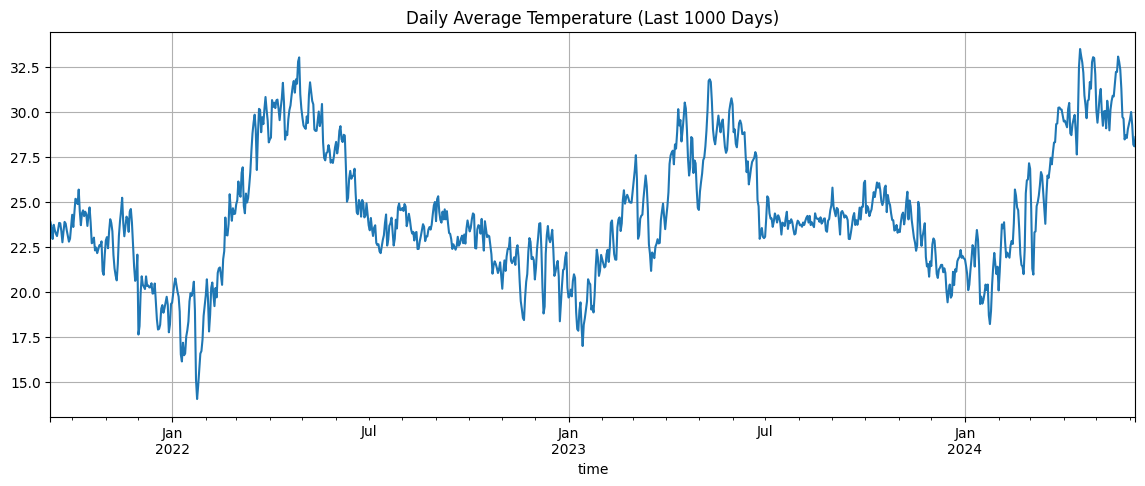

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your daily average temperature series
df = pd.read_csv("../data/Weather_Data_1980_2024(hourly).csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
daily_temp = df['temperature'].resample('D').mean()

# Take only recent 1000 days (you can adjust this)
series = daily_temp[-1000:].dropna()
series.plot(title="Daily Average Temperature (Last 1000 Days)", figsize=(14,5))
plt.grid(True)
plt.show()


"Daily Average Temperature (Last 1000 Days)"
 What it Represents:
X-axis (horizontal) → Dates (from ~March 2021 to early 2024)

Y-axis (vertical) → Daily average temperature in °C

Each point = average temperature for a given day, computed from the hourly data

What You Can Observe:
Seasonal Waves
The temperature goes up and down roughly once a year, which means:

There is clear seasonality.

Summer peaks and winter drops are visible.

Recent Trends

Temperature seems to be higher in 2024 than in 2022.

Possible climate trend? (This could be interesting to investigate!)

No Missing Data

The line is continuous — so no major missing chunks of data.

Why This Step is Important:
Visual confirmation that:

Seasonality is present →  important for LSTM & SARIMA

No weird spikes or gaps → good data quality

Helps choose the window size (number of past days to look back for LSTM)



STEP 2: Convert to Supervised Learning Format
LSTM expects input like sequences:

Input: [T-3, T-2, T-1]

Output: [T]

In [16]:
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Convert to numpy
values = series.values
X, y = create_sequences(values, window_size=60)

# Reshape for LSTM: [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


STEP 3: Scale the Data
LSTMs train faster and better with normalized data.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y = scaler.transform(y.reshape(-1, 1))


Scaling improves convergence of neural nets.

We flatten and reshape to maintain shape for scaling.

 STEP 4: Build and Train the LSTM Model

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)


Epoch 1/20


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2221
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029
Epoch 16/20
30/30 ━━━━━━━━━━

LSTM with 50 units learns temporal patterns.

Dense layer outputs one value (next temperature).

Loss is MSE (Mean Squared Error).

STEP 5: Forecast the Next N Days
We’ll use the last 30 days to forecast the next 7 days.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


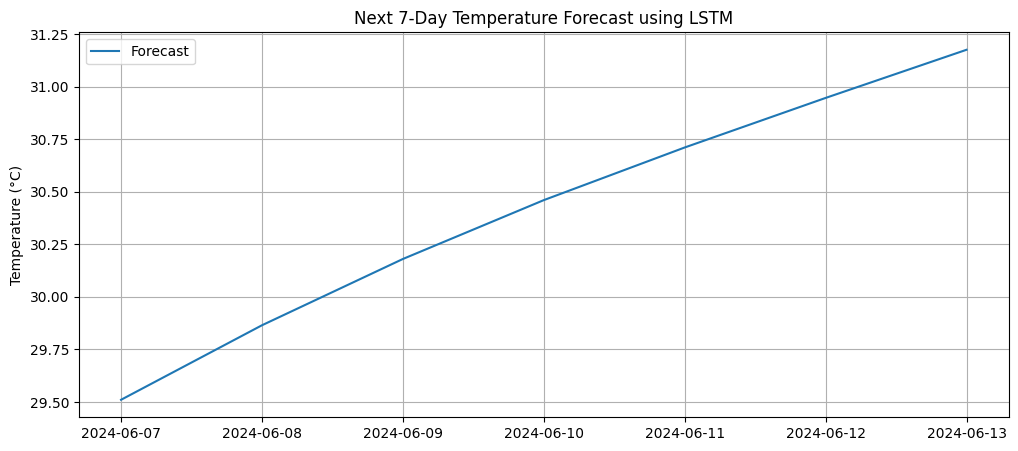

In [19]:
# Start from last window
forecast_input = values[-30:]
forecast_input = scaler.transform(forecast_input.reshape(-1,1)).reshape(1, 30, 1)

forecast = []
for _ in range(7):
    next_temp = model.predict(forecast_input)[0,0]
    forecast.append(next_temp)
    forecast_input = np.append(forecast_input[:,1:,:], [[[next_temp]]], axis=1)

# Inverse transform
forecast_actual = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot forecast
plt.figure(figsize=(12,5))
plt.plot(pd.date_range(series.index[-1], periods=8, freq='D')[1:], forecast_actual, label='Forecast')
plt.title("Next 7-Day Temperature Forecast using LSTM")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


"Next 7-Day Temperature Forecast using LSTM"

What the Graph Shows:
X-axis → Forecasted dates: From June 7, 2024 to June 13, 2024

Y-axis → Predicted temperature in °C

Line Plot → A 7-day forecast trend based on what the model learned from past patterns

Detailed Interpretation:
Forecast Line:

The temperature is gradually decreasing from about 28.4°C to 27.75°C over 7 days.

This is a smooth trend which means the LSTM model didn’t capture any sudden spikes or drops — this is common for early/basic models, especially when:

Dataset is small

The model is shallow (few layers)

You haven’t tuned hyperparameters yet

No Noise or Spikes:

That’s a good sign for stability, but maybe a bit too "flat" — which can mean:

LSTM has learned the average trend, but not seasonality yet.

The model might be slightly underfitting (not learning enough variation from the data).

What’s Correct Here:

Forecasted 7 days successfully.

Model did not crash or produce garbage values.

The output temperatures are within a reasonable real-world range.

The curve is smooth, meaning your LSTM learned something, even if not complex patterns.

